<a href="https://colab.research.google.com/github/Hsuyeon01/ESAA/blob/main/%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EC%84%9D_(1014_%EA%B3%BC%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 8. 텍스트 분석

1. 텍스트 분석 :
  -  Text Categorization이라고도 함
  - 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법을 통칭
  - 지도학습을 적용
2. 감성 분석 :
  - 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법을 총칭
  - 소셜 미디어 감정 분석, 영화나 제품에 대한 긍정 또는 리뷰, 여론조사 의견 분석 등의 다양한 영역에서 활용됨
  - Text Analytics에서 가장 활발하게 사용되고 있는 분야
  - 지도학습 방법뿐만 아니라 비지도학습을 이용해 적용
3. 텍스트 요약 : 
  - 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법
  - 대표적으로 토픽 모델링
4. 텍스트 군집화와 유사도 측정 :
  - 비슷한 유형의 문서에 대해 군집화를 수행하는 기법을 말함
  - 텍스트 분류를 비지도학습으로 수행하는 방법의 일환으로 사용될 수 있음
  - 유사도 측정 역시 문서들간의 유사도를 측정해 비슷한 문서끼리 모을 수 있는 방법




---



## 01. 텍스트 분석 이해

텍스트 분석

- 비정형 데이터인 텍스트를 분석하는 것
- 텍스트를 word(또는 word의 일부분) 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현될 수 있는데, 이렇게 텍스트를 변환하는 것을 **피처 벡터화** 또는 **피처 추출**이라고 함
  - 대표적으로 BOW와 Word2Vec 방법이 있음

### 텍스트 분석 수행 프로세스

1. 텍스트 사전 준비작업 (텍스트 전처리) : 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어 등의 토큰화 작업, 의미없는 단어 제거 작업, 어근 추출 등의 텍스트 정규화 작업을 수행하는 것을 통칭
2. 피처 벡터화/추출 : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당함
   - 대표적인 방법은 BOW와 Word2Vec이 있으며, BOW는 대표적으로 Count 기반과 TF-IDF 기반 벡터화가 있음
3. ML 모델 수립 및 학습/예측/평가 : 피처 벡터화된 데이터 세트에 ML모델을 적용해 학습/예측 및 평가를 수행


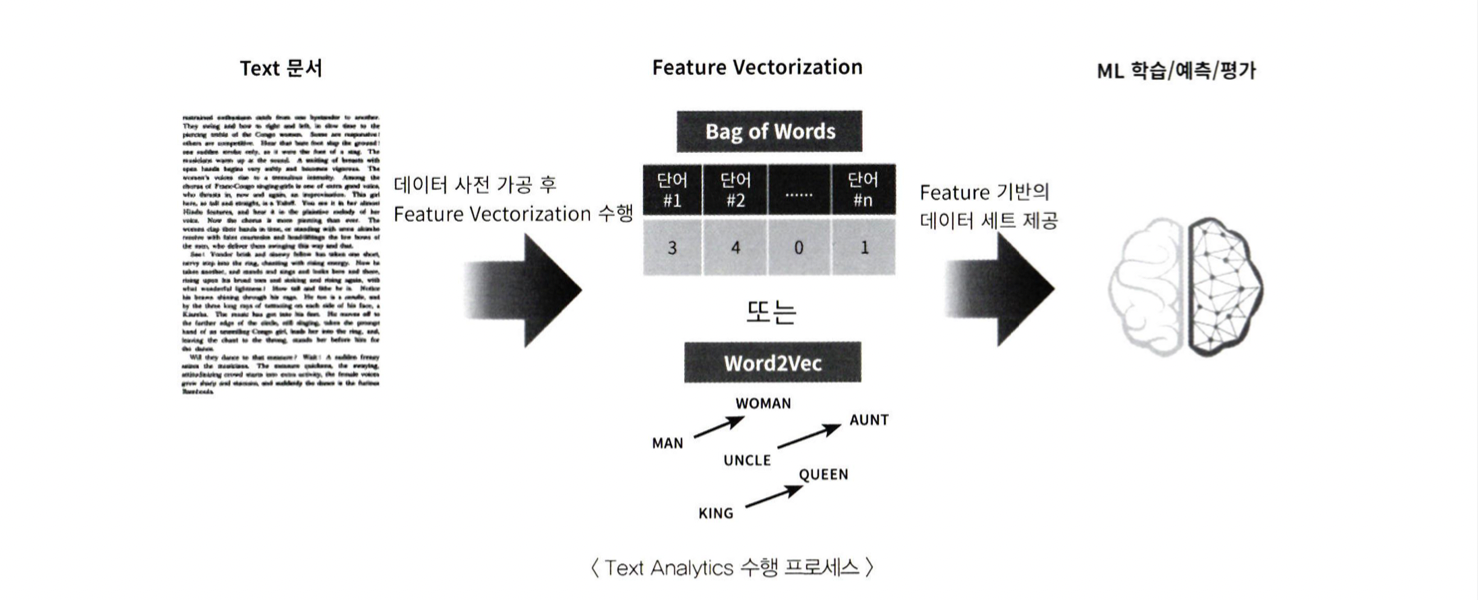

### 파이썬 기반의 NLP, 텍스트 분석 패키지

1. NLTK : 파이썬의 가장 대표적인 NLP 패키지
  - 방대한 데이터 세트와 서브 모듈을 가지고 있으며 NLP의 거의 모든 영역을 커버하고 있음
  - 많은 NLP 패키지가 NLTK의 영향을 받아 작성되고 있음
  - 수행 속도 측면에서 아쉬운 부분이 있어서 실제 대량의 데이터 기반에는 활용되지 못하고 있음
2. Gensim : 토픽 모델링 분야에서 가장 두각을 나타내는 패키지
  - 오래전부터 토픽 모델링을 쉽게 구현할 수 있는 기능을 제공해 왔으며, Word2Vec 구현 등의 다양한 신기능도 제공
  - SpaCy와 함께 가장 많이 사용되는 NLP 패키지
3. SpaCy : 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지
  - 많은 NLP 애플리케이션에서 SpaCy를 사용하는 사례가 늘고 있음

## 02. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

텍스트 정규화 : 텍스트를 머신러닝 알고리즘이나 NLP 어플리케이션에 입력 데이터로 사용하기 위해 클렌징, 정제, 토큰화, 어근화 등의 다양한 텍스트 데이터의 사전 작업이 수행하는 것을 의미
- 클렌징
- 토큰화
- 필터링/스톱 위드 제거/철자 수정
- Stemming
- Lemmatization

### 클렌징

텍스트에서 분석에 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업, 예를 들어 HTML, XML 태그나 특정 기호 등을 사전에 제거

### 텍스트 토큰화

토큰화의 유형
- 문장 토큰화 : 문서에서 문장을 분리
- 단어 토큰화 : 문장에서 단어를 토큰으로 분리

**문장 토큰화**

- 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적
- sent_tokenize를 이용해 토큰화를 수행

In [1]:
# 3개의 문장으로 이루어진 텍스트 문서를 문장으로 각각 분리하는 예제
from nltk import sent_tokenize
import nltk
nltk.download('punkt') # 마침표, 개행 문자등의 데이터 세트를 다운 받음

text_sample = 'The Matrix is everywhere its all around us, here even in the room. \ You can see it out your window or on you television. \ You can feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample) 
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in the room.', '\\ You can see it out your window or on you television.', '\\ You can feel it when you go to work, or go to church or pay your taxes.']


**단어 토큰화**

- 문장을 단어로 토큰화 하는 것
- 기본적으로 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어를 분리하지만, 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행할 수 있음
- word_tokenize()를 이용해 토큰화를 수행

In [2]:
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [3]:
# sent_tokenize, word_tokenize를 조합해 문서에 대해서 모든 단어를 토큰화
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'the', 'room', '.'], ['\\', 'You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'you', 'television', '.'], ['\\', 'You', 'can', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시됨 -> n_gram으로 해결

- n_gram은 연속된 n개의 단어를 하나씩 토큰화 단위로 분리해내는 것
- n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화 수행

**스톱 워드 제거**

- 분석에 큰 의미가 없는 단어 제거
- is, the, a, will 등 문장을 구성하는 필수 문법 요소지만 문맥적으로 큰 의미가 없는 단어가 이에 해당 -> 빈번함을 인해 중요한 단어로 인지될 수 있음, 제거 필요

In [4]:
# NTLK의 스톱워드 목록 내려받기
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# English의 경우 몇 개의 스톱워드가 있는지 확인
print('English stop words 개수 :', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])


English stop words 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [6]:
# 스톱워드 제거
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환
    word = word.lower()
    # 토큰화된 개별 단어가 스톱워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
    all_tokens.append(filtered_words)

In [7]:
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', '

**Stemming과 Lemmatization**

- 문법적 또는 의미적으로 변화하는 단어의 원형을 찾음
- Lemmatization이 Stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾음
  - Stemming은 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있음
  - Lemmatization은 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아줌 -> 변환에 더 오랜 시간을 필요로 함
- NLTK의 LancasterStemmer : 진행형, 3인칭 단수, 과거형에 따른 동사, 비교, 최상에 따른 형용사 변화에 따라 Stemming은 더 단순하게 원형 단어를 찾아줌

In [8]:
# Stemming
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused')) # amus 원형으로 인식
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest')) # 비교형, 최상급 원형 찾지 못함

work work work
amus amus amus
happy happiest
fant fanciest


In [9]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [10]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'), lemma.lemmatize('amuses','v'), lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'), lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'), lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


## 03. Bag of Words - BOW

- 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처값을 추출하는 모델

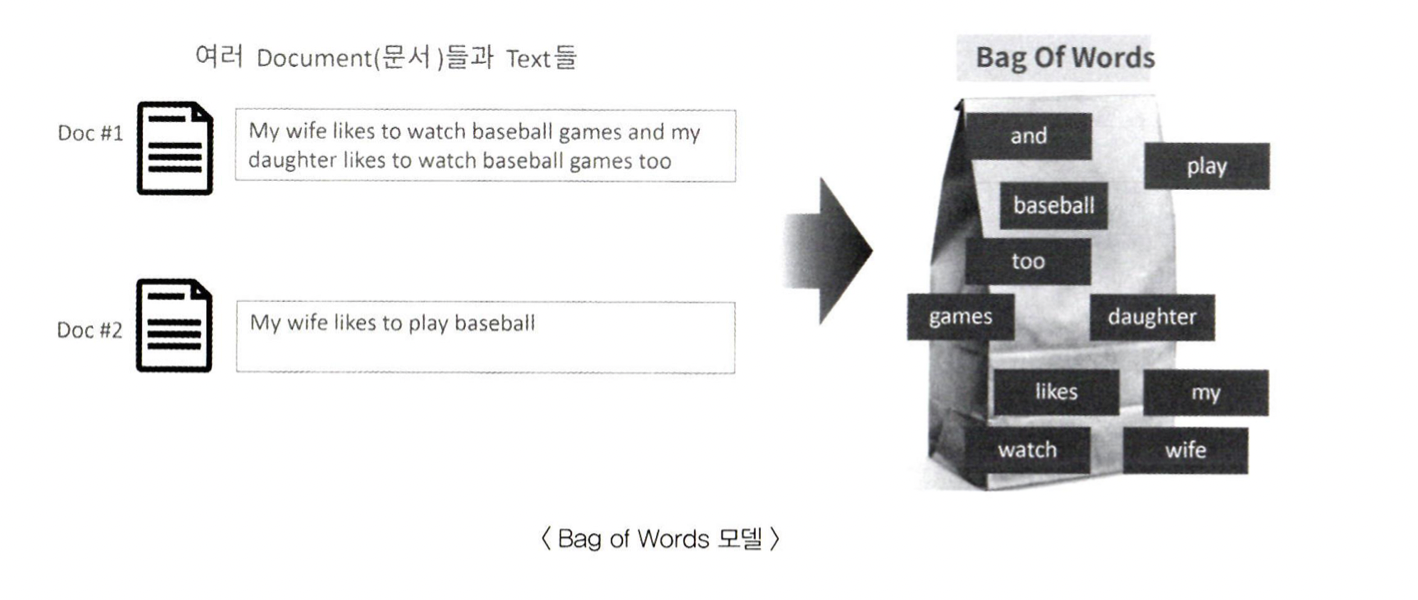

1. 문장 1과 문장 2에 있는 모든 단어에서 중복을 제거하고 각 단어를 칼럼 형태로 나열, 그러고 나서 각 단어에 고유의 인덱스를 부여
2. 개별 문장에서 해당 단어가 나타나는 횟수를 각 단어에 기재

대표적인 단점

- 문맥 의미 반영 부족 : BOW는 단어이 순서를 고려하지 않기 때문에 문장 내에서 단어의 문맥적인 의미가 무시됨
- 최소 행렬 문제 (희소성, 희소 행렬) : BOW로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움. 많은 문서에서 단어를 추출하면 매우 많은 단어가 칼럼으로 만들어짐. 문서마다 서로 다른 단어로 구성되기에 단어가 문서마다 나타나지 않는 경우가 훨씬 더 많음. 대부분의 데이터는 0 값으로 채워짐.

### BOW 피처 벡터화

피처 벡터화 : 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환
- 각 문서의 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생 빈도와 같은 값이 피처에 값으로 부여해 각 문서를 이 단어 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법
- 기존 텍스트 데이터를 또 다른 형태의 피처의 조합으로 변경하기 때문에 넓은 범위의 피처 추출에 포함
- BOW 모델에서 피처 벡터화를 수행한다는 것은 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것
  - 카운트 기반의 벡터화 : 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수를 부여
    - 카운트 값이 높을수록 중요한 단어로 인식
    - 문서의 특징을 나타내기 보다는 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어까지 높은 값을 부여하게 됨
  - TF-IDF (Term Frequency - Inverse Document Frequency) 기반의 벡터화
    - 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여 -> 단어에 대한 가중치의 균형을 맞춤
    - 문서마다 텍스트가 길고 문서의 개수가 많은 경우 더 좋은 예측 성능 보장

### 사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidfVectorizer

CountVectorizer : 카운트 기반의 벡터화를 구현한 클래스
- 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행

CountVectorizer 파라미터
- max_df : 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
  - 너무 높은 빈도수를 가지는 단어는 스톱워드와 비슷한 문법적인 특성으로 반복적인 단어일 가능성이 높기에 이를 제거하기 위해 사용됨
  - 정수값(100)을 가지면 정수값(100) 이하로 나타나는 단어만 피처로 추출
  - 부동소수점(0.95) 값(0.0~1.0)을 가지면 빈도수 0~95%까지의 단어만 피처로 추출
- min_df : 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
  - 수백~수천 개의 전체 문서에서 특정 단어가 min_df에 설정된 값보다 적은 빈도수를 가진다면 크게 중요하지 않거나 가비지(garbage)성 단어일 확률이 높음
- max_features : 추출하는 피처의 개수를 제한하며 정수로 값을 지정
  - 2000으로 지정하면 가장 높은 빈도를 가지는 단어 순으로 정렬해 2000개까지만 피처로 추출
- stop_words : 'english'로 지정하면 영어의 스톱워드로 지정된 단어는 추출에서 제외
- n_gram_range : Bag of Words 모델의 단어 순서를 어느 정도 보강하기 위한 n_gram 범위를 설정
  - 튜플 형태로 (범위 최솟값, 범위 최댓값)을 지정
  - 예를 들어 (1,1)로 지정하면 토큰화된 단어를 1개씩 피처로 추출
  - (1,2)로 지정하면 토큰화된 단어를 1개씩, 그리고 순서대로 2개씩 묶어서 피처로 추출
- analyzer : 피처 추출을 수행한 단위를 지정
  - 디폴트는 'word'
  - word가 아니라 character의 특정 범위를 피처로 만드는 특정한 경우 등을 적용할 때 사용
- token_pattern : 토큰화를 수행하는 정규 표현식 패턴을 지정
  - 디폴트 값은 '\b\w\w+\b'로 공백 또는 개행 문자 등으로 구분된 단어 분리자(\b) 사이의 2문자 이상의 단어를 토큰으로 분리
  - analyzer='word'로 설정했을 때만 변경 가능하나 디폴트 값을 변경할 경우는 거의 발생하지 않음
- tokenizer : 토큰화를 별도의 커스텀 함수로 이용시 적용
  - 일반적으로 어근 변환 시 이를 수행하는 별도의 함수를 적용하면 됨

CountVectorizer 클래스를 이용해 카운트 기반의 피처 여러 개의 문서로 구성된 텍스트의 피처 벡터화 방법

1. 전처리 작업 수행
2. 디폴트로 단어를 기준으로 n_gram_range를 반영해 각 단어를 토큰화
3. 텍스트 정규화를 수행 (stop_words = 'english'와 같이 파라미터가 주어진 경우 스톱 워드 필터링만 가능함)
4. max_df, min_df, max_features 등의 파라미터를 이용해 토큰화된 단어를 피처로 추출하고 단어 빈도수 벡터값을 적용

TF-IDF 벡터화는 TfidVectorizer 클래스를 이용하면 파라미터와 변환 방법은 CountVectorizer와 동일

### BOW 벡터화를 위한 희소 행렬

희소 행렬 : 대규모 행렬의 대부분의 값을 0이 차지하는 행렬
- BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 희소행렬
- 너무 많은 불필요한 0 값이 메모리 공간에 할당되어 메모리 공간이 많이 필요하며, 행렬의 크기가 커서 연산 시에도 데이터 엑세스를 위한 시간이 많이 소모됨
- 희소행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도로 변환해야 함 -> COO 형식, CSR 형식
- 일반적으로 큰 희소 행렬을 저장하고 계산을 수행하는 능력이 CSR 형식이 더 뛰어나기 때문에 CSR를 많이 사용

### 희소행렬 - COO 형식

COO 형식

- 0이 아닌 데이터만 별도의 데이터 배열에 저장하고 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식

In [11]:
import numpy as np
dense  = np.array([[3,0,1],[0,2,0]])

In [12]:
# scipy의 coo_matrix 클래스를 이용해 COO 형식의 희소 행렬로 변환
# 0이 아닌 데이터를 별도의 배열 데이터로 만들고, 행 위치 배열과 열 위치 배열을 각각 만든 후 coo_matrix() 내에 생성 파라미터로 입력하면 됨

from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [13]:
# 다시 밀집 형태의 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

다시 원래의 데이터 행렬로 추출됨

### 희소 행렬 - CSR 형식

CSR 형식

- COO 형식이 행과 열의 위치를 나타내기 위한 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

In [14]:
# scipy의 csr_matrix 클래스를 이용해 CSR 형식의 희소 행렬로 변환
# 0이 아닌 데이터 배열과 열 위치 배열, 행 위치 배열의 고유한 값의 시작 위치 배열을 csr_marix의 생성 파라미터로 입력하면 됨
from scipy import sparse

dense2 = np.array([
    [0,0,1,0,0,5],
    [1,4,0,3,2,5],
    [0,6,0,3,0,0],
    [2,0,0,0,0,0],
    [0,0,0,7,0,8],
    [1,0,0,0,0,0]
])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [15]:
dense3 = np.array([
    [0,0,1,0,0,5],
    [1,4,0,3,2,5],
    [0,6,0,3,0,0],
    [2,0,0,0,0,0],
    [0,0,0,7,0,8],
    [1,0,0,0,0,0]
])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)